In [1]:
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


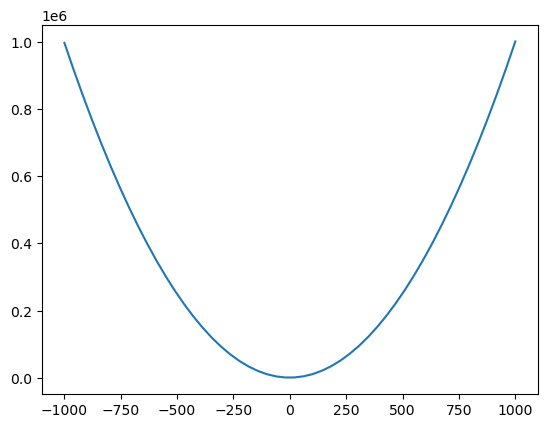

In [2]:
x = np.linspace(-1000,1000)
y =  x**2 + 2*x - 3
plt.plot(x,y)
plt.show()

In [3]:
# x_0 : point de départ
# eta : taux d'apprentissage
#nombre_iter : nombre d'itération
# grille : grille de valeur pour le tracé
def gradient_descente (x_0,eta ,nombre_iter ,fonction ,derivee ,grille) :
    plt.grid()
    x_pred=x_0
    y=fonction(grille)
    plt.plot(grille,y)
    plt.scatter(x_0 , fonction(x_0),c='red',marker='*',s =100)
    for i in range( nombre_iter ):
        x_new = x_pred - eta * derivee(x_pred)
        plt.scatter(x_new,fonction(x_new),c='red',marker='*',s =100)
        x_pred=x_new
    plt.show()
    return x_new


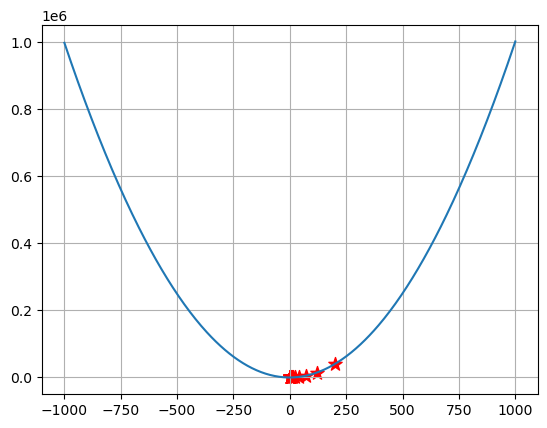

-0.9926511215354734

In [4]:
def fonction(x):
    return x**2 + 2*x - 3

def derivee(x):
    return 2*x + 2
gradient_descente(200,0.2, 20, fonction, derivee,np.linspace(-1000, 1000, 400))

### utilisation de la gradient descent

In [9]:
def derivate(a1,xi_list,yi_list):
    n = len(xi_list)
    somme = 0
    for i in range(n):
        somme += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    
    deriv = (2*somme)/n
    return deriv


def gradient_descent(xi_list,yi_list,max_iteration,alpha,a1_initial):
        a1_list = [a1_initial]
        
        for i in range(max_iteration):
            a1 = a1_list[i]
            deriv = derivate(a1,xi_list,yi_list)
            a1_new = a1 - alpha*deriv
            a1_list.append(a1_new)
        return a1_list


In [11]:
data = pd.read_csv('..\data\AmesHousing.txt',delimiter = "\t")
train = data[0:1460]
test = data[1460:]

param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'],
                                   20,.0000003,150)
print(param_iterations[-1])
final_param = param_iterations[-1]


120.14219147202738


### gradient déscent à 2 paramètre

In [14]:
def a1_derivate(a0,a1,xi_list,yi_list):
    n = len(xi_list)
    somme = 0
    for i in range(n):
        somme += xi_list[i]*(a0+a1*xi_list[i] - yi_list[i])
    
    deriv = (2*somme)/n
    return deriv

def a0_derivate(a0,a1,xi_list,yi_list):
    n = len(xi_list)
    somme = 0
    for i in range(n):
        somme += (a0+a1*xi_list[i] - yi_list[i])
    
    deriv = (2*somme)/n
    return deriv



def gradient_descent(xi_list,yi_list,max_iteration,alpha,a1_initial,a0_initial):
        a1_list = [a1_initial]
        a0_list = [a0_initial]
        
        for i in range(max_iteration):
            a1 = a1_list[i]
            a0 = a0_list[i]
            
            a1_deriv = a1_derivate(a0,a1,xi_list,yi_list)
            a0_deriv = a0_derivate(a0,a1,xi_list,yi_list)
            
            a1_new = a1 - alpha*a1_deriv
            a0_new = a0 - alpha*a0_deriv
            
            a1_list.append(a1_new)
            a0_list.append(a0_new)
        return (a0_list, a1_list)

a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'],
                                   20,.0000003,150,1000)
print(a0_params, a1_params)

[1000, 999.9729797812329, 999.985903701066, 999.980232547139, 999.9832179015052, 999.9821734177915, 999.983004932363, 999.9829631191217, 999.9833278635107, 999.98350334434, 999.9837669324418, 999.9839895042135, 999.9842311701743, 999.9844639472566, 999.9847008623329, 999.9849358510428, 999.9851717365096, 999.9854072044933, 999.985642866808, 999.9858784386378, 999.986114052572] [150, 105.34801721547944, 126.13471917628125, 116.45794862200977, 120.96274606972909, 118.86564116059868, 119.84189984026605, 119.38742488614261, 119.59899502291616, 119.50050320781361, 119.54635359313434, 119.52500879150305, 119.53494516153384, 119.53031930255781, 119.53247255390217, 119.53146994657168, 119.53193647656232, 119.53171908350993, 119.53182007507831, 119.53177285001942, 119.53179462379771]
